<a href="https://colab.research.google.com/github/ssanudo/ProcesamDigImagTP/blob/main/TP1/Copy_of_PDItp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Color RGB**

Lo que hace que un objeto sea percibido con un determinado color responde, por una parte, a las propiedades de la luz incidente en el objeto, es decir, a las características de la radiación visible necesaria para iniciar todo proceso de visión humana (ya sea cromática o no). En segundo lugar, a las propiedades químicas de la materia de la que están formados los cuerpos, algo que afectará
sensiblemente a la interacción de la luz con estos últimos y, por último, al sistema visual humano que será el que determine la sensación cromática final percibida por nuestro cerebro, según las ondas de luz transmitidas o reflejadas por el objeto que han penetrado en el ojo humano (figura 2.1) [Gilabert, 1992]. Por este último factor, una determinada muestra de color no es percibida exactamente igual por dos observadores.[de https://rua.ua.es/dspace/bitstream/10045/10053/4/Ortiz-Zamora-Francisco-Gabriel_3.pdf]

Con el espacio cromático RGB es posible representar cada estímulo cromático  mediante la mezcla por adición de los tres colores (rojo, verde y azul) de luz primarios. Aunque los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos, ya que sus espacios de color pueden variar considerablemente.

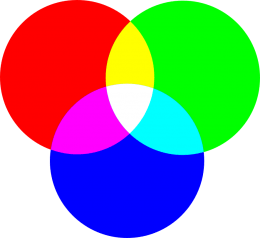


El valor de cada uno de los valores RGB está relacionado con el espectro electromagnético visible, y la energía que tenga el estímulo a cada una de las longitudes de onda del espectro.


#**Trabajo Práctico Nro. 1**
#Color RGB
A continuación se puede obtener el valor RGB del color de un pixel de la imágen.


In [2]:
import numpy as np
from PIL import Image
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:


#
#@title ## Image RGB
#@markdown You can also your image or use mine: imageio:chelsea.png
#@markdown ---
#@markdown ### Enter an Image path:
file_path = "imageio:chelsea.png" #@param {type:"string"}
#@markdown ---

#Abro la img en PNG como un arreglo
im = imageio.imread(file_path)
print('Tamaño del arreglo',im.shape, 'donde', im.shape[0], 'x',im.shape[1],'es el tamaño de la imágen en píxeles, y ',im.shape[2], 'es el valor RGB de cada uno de dichos píxeles' )


Tamaño del arreglo (300, 451, 3) donde 300 x 451 es el tamaño de la imágen en píxeles, y  3 es el valor RGB de cada uno de dichos píxeles


In [12]:
def MuestraRGB(y,x):
  imShowSelectedPixel=im.copy()
  print('PixAncho=',x,'PixAlto= ',y)
  for i in range(3,20):
    for j in range(2,20):
      if (x+i<=im.shape[1])and (y-j>=0):imShowSelectedPixel[y-j,x+i]=(52, 235, 207)
      if (x+i<=im.shape[1])and (y-j>=0):imShowSelectedPixel[y-j,x+i]=(52, 235, 207)
      if (x+i<=im.shape[1])and (y+j<=im.shape[0]):imShowSelectedPixel[y+j,x+i]=(52, 235, 207)
      #if (x-i)<=im.shape[1]:
        #print('entra i=',i,'x-i=',x-i,' y-j=',y-j,'y+j=',y+j)
      if (x-i>=0)and (y-j>=0):imShowSelectedPixel[y-j,x-i]=(52, 235, 207)
      if (x-i>=0)and (y+j<=im.shape[0]):imShowSelectedPixel[y+j,x-i]=(52, 235, 207)
      #else:print('no entra i=',i,'x-i=',x-i,' y-j=','y+j=',y+j)
  for i in range(3):
    for j in range(3):          
      if (x+i<im.shape[1])and (y-j>=0):imShowSelectedPixel[y-j,x+i]=im[y,x]
      if (x+i<im.shape[1])and (y+j<im.shape[0]):imShowSelectedPixel[y+j,x+i]=im[y,x]
      #if (x-i)<=im.shape[1]:
      if (x-i>=0)and (y-j>=0):imShowSelectedPixel[y-j,x-i]=im[y,x]
      if (x-i>=0)and (y+j<im.shape[0]):imShowSelectedPixel[y+j,x-i]=im[y,x]
  
  print('Así se vé el pixel [',y,',',x,'] (ubicado dentro del cuadrado cian) que contiene ',im[y,x][0],'Red, ',im[y,x][1],' Green, y ',im[y,x][2],' Blue.')
  fig = plt.figure(figsize=(10, 20))
  fig.add_subplot(1, 2, 2)
  plt.imshow([[im[y,x]]])
  fig.add_subplot(1, 2, 1)
  plt.imshow(imShowSelectedPixel)
  plt.show()

def normalizeRGB(x):return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))
"""
    Normaliza el valor RGB de la imagen en el rango [0,1]
    : x: Lista de RGB  de la imágen
"""


#Defino las matrices de conversión, de RGB a YIQ y viseversa.
rgb2yiq=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
#print(rgb2yiq)
yiq2rgb=np.array([[1,0.9663,0.621],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
#print(yiq2rgb)


def ModifyYIQ(im2,alfa,beta):
  imNorm=normalizeRGB(im2.copy())
  #Obtengo valores de YIQ 
  Arr_YIQ=np.dot(imNorm, rgb2yiq.T)

  #modifico luminancia
  Arr_YIQmod=Arr_YIQ.copy()
  Arr_YIQmod[:,:,0]=alfa*Arr_YIQmod[:,:,0]
  #if (Arr_YIQmod[:,:,0].any()>=1):
    #print('debe modificar alfa')  
  Arr_YIQmod[:,:,1]=beta*Arr_YIQmod[:,:,1]
  Arr_YIQmod[:,:,2]=beta*Arr_YIQmod[:,:,2]
  #if ((Arr_YIQmod[:,:,1].any()<=-0.5957)or(Arr_YIQmod[:,:,1].any()>=0.5957)or(Arr_YIQmod[:,:,2].any()<=-0.5226)or(Arr_YIQmod[:,:,2].any()>=0.5226)):
    #print('Cambie el valor de beta')

  #Fuerzo los valores fuera de rango

  Arr_YIQmod[:,:,0][Arr_YIQmod[:,:,0]>=1]=1
  Arr_YIQmod[:,:,1][Arr_YIQmod[:,:,1]<-0.5957]=-0.5957
  Arr_YIQmod[:,:,1][Arr_YIQmod[:,:,1]>0.5957]=0.5957
  Arr_YIQmod[:,:,2][Arr_YIQmod[:,:,2]<-0.5226]=-0.5226
  Arr_YIQmod[:,:,2][Arr_YIQmod[:,:,2]>0.5226]=0.5226
  #print('Arr_YIQmod',Arr_YIQmod)
  #Vuelvo a RGB normalizado
  Arr_RGBmod=np.dot(Arr_YIQmod, yiq2rgb.T)
  #Desnormalizo
  Arr_RGBmod=Arr_RGBmod*255
  ImMod=Arr_RGBmod.astype('uint8')
  fig = plt.figure(figsize=(10, 20))
  fig.add_subplot(1, 2, 1)
  plt.imshow(im2)
  fig.add_subplot(1, 2, 2)
  plt.imshow(ImMod)
  plt.show()


En alto: 118
En ancho: 147
PixAncho= 147 PixAlto=  118
Así se vé el pixel [ 118 , 147 ] (ubicado dentro del cuadrado cian) que contiene  148 Red,  119  Green, y  61  Blue.


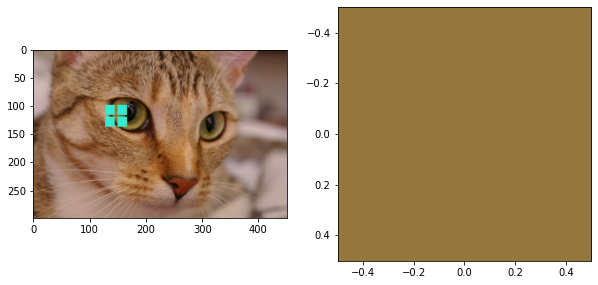

In [5]:
#@title ## Obtención de RGB de una imágen
#@markdown  Seleccione el lugar de la imágen cuyo RGB desea obtener
ImgHeight=im.shape[0]
ImgWidth=im.shape[1]
PixelX = 147 #@param {type:"slider", min:0, max:300, step:1}
PixelY = 118 #@param {type:"slider", min:0, max:450, step:1}


print('En alto:',PixelY)
print('En ancho:',PixelX)
MuestraRGB(PixelY,PixelX)

#**Espacio YIQ**

A continuación, a partir de la conversión del RGB de la imágen a YIQ, es posible variar su luminancia con alfa, y cromaticidad con beta.

In [6]:
#
#@title ## Image Luminance (Y) and Chromatizity (IQ) 
#@markdown You can use your image or use mine: imageio:chelsea.png
#@markdown ---
#@markdown ### Enter an Image path:
file_path2 = "imageio:chelsea.png" #@param {type:"string"}
#@markdown ---

#Abro la img en PNG como un arreglo
im2 = imageio.imread(file_path2)
print('Tamaño del arreglo',im2.shape, 'donde', im2.shape[0], 'x',im2.shape[1],'es el tamaño de la imágen en píxeles, y ',im.shape[2], 'es el valor RGB de cada uno de dichos píxeles' )


Tamaño del arreglo (300, 451, 3) donde 300 x 451 es el tamaño de la imágen en píxeles, y  3 es el valor RGB de cada uno de dichos píxeles


Luminancia: 1.5 * Y
Cromaticidad: 2.6  * I,  2.6  * Q
A continuación se muestra la imágen original (izquierda) y la modificada (derecha)


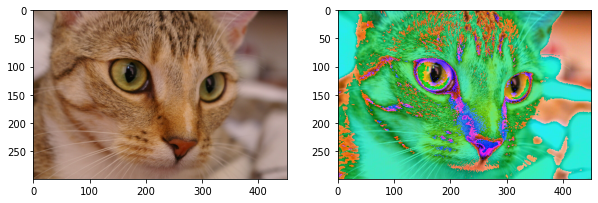

In [17]:
#@title ## Cambio los factores de Luminancia y Cromaticidad en el espacio YIQ de una imágen
#@markdown  Seleccione los valores a modificar:

Luminancia=1.5 #@param {type:"slider", min:-4, max:4, step:0.1}
Cromaticidad=2.6 #@param {type:"slider", min:-4, max:4, step:0.1}


print('Luminancia:',Luminancia,'* Y')
print('Cromaticidad:',Cromaticidad,' * I, ',Cromaticidad,' * Q')
print('A continuación se muestra la imágen original (izquierda) y la modificada (derecha)')
ModifyYIQ(im2,Luminancia,Cromaticidad)
